In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Crop_recommendation.CSV")


In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.label.value_counts()

coffee         100
lentil         100
grapes         100
papaya         100
kidneybeans    100
blackgram      100
muskmelon      100
rice           100
mungbean       100
jute           100
coconut        100
maize          100
watermelon     100
orange         100
cotton         100
apple          100
mango          100
pomegranate    100
mothbeans      100
banana         100
chickpea       100
pigeonpeas     100
Name: label, dtype: int64

In [5]:
df.label.value_counts().sum()

2200

In [6]:
df.iloc[381]

N                       11
P                       78
K                       22
temperature      23.897568
humidity          22.74379
ph                5.940547
rainfall        112.661643
label          kidneybeans
Name: 381, dtype: object

<AxesSubplot:>

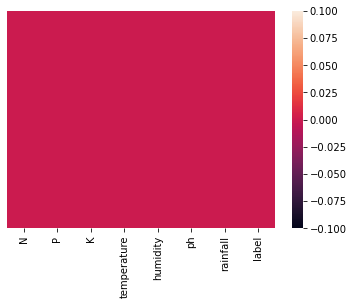

In [7]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = bool)

In [8]:
df_x = df.drop('label',1)
df_y = df['label']

In [9]:
df_x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [10]:
scaler = StandardScaler()

In [11]:
# scaled = scaler.fit_transform(df[['N']])
# df_x['N'] = scaled

In [12]:
scaled = scaler.fit_transform(df[['P']])
df_x['P'] = scaled

scaled = scaler.fit_transform(df[['K']])
df_x['K'] = scaled

scaled = scaler.fit_transform(df[['temperature']])
df_x['temperature'] = scaled

scaled = scaler.fit_transform(df[['humidity']])
df_x['humidity'] = scaled

scaled = scaler.fit_transform(df[['rainfall']])
df_x['rainfall'] = scaled

scaled = scaler.fit_transform(df[['ph']])
df_x['ph'] = scaled


In [13]:
df_x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,85,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,60,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,74,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,78,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [13]:
df_x.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
len(df_y.value_counts())

22

In [15]:
df_x_train,df_x_test,df_y_train,df_y_test = train_test_split(df_x,df_y,test_size = 0.3, random_state = 42,stratify = df_y)

In [16]:
import xgboost as xgb

In [29]:
params_xgb = {
    'booster': ['gbtree'],
    'normalize_type': ['tree'],
    'objective': ['multi:softprob'],
    'max_depth':[3,4,5,6],
    'num_class' : [22]    
}

In [30]:
# gridsearch = GridSearchCV(xgb.XGBClassifier(),params_xgb,cv=5,verbose = 1,n_jobs = -1)
# model = gridsearch.fit(df_x_train,df_y_train)

In [31]:
random_search = RandomizedSearchCV(xgb.XGBClassifier(),params_xgb,cv = 5,scoring = 'f1_macro',n_jobs = -1,verbose = 1)
model = random_search.fit(df_x_train,df_y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "normalize_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
type(model)

sklearn.model_selection._search.RandomizedSearchCV

In [33]:
params_new = model.best_params_

In [34]:
params_new

{'objective': 'multi:softprob',
 'num_class': 22,
 'normalize_type': 'tree',
 'max_depth': 5,
 'booster': 'gbtree'}

In [35]:
model1 = xgb.XGBClassifier(params_new , seed = 42)
model1.fit(df_x_train,df_y_train)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\core.py:499: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[14:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
model1.predict(df_x_test)

array(['kidneybeans', 'mothbeans', 'blackgram', 'jute', 'jute',
       'kidneybeans', 'papaya', 'mango', 'coffee', 'maize', 'rice',
       'papaya', 'coconut', 'orange', 'mango', 'banana', 'lentil',
       'chickpea', 'blackgram', 'cotton', 'mango', 'muskmelon', 'banana',
       'kidneybeans', 'pigeonpeas', 'papaya', 'jute', 'mango',
       'kidneybeans', 'grapes', 'mothbeans', 'jute', 'mungbean',
       'pomegranate', 'mothbeans', 'rice', 'kidneybeans', 'cotton',
       'blackgram', 'grapes', 'mothbeans', 'apple', 'coconut',
       'watermelon', 'cotton', 'kidneybeans', 'maize', 'chickpea',
       'orange', 'cotton', 'mango', 'kidneybeans', 'muskmelon', 'lentil',
       'apple', 'banana', 'apple', 'maize', 'banana', 'coconut', 'lentil',
       'chickpea', 'banana', 'pigeonpeas', 'coconut', 'rice',
       'pigeonpeas', 'papaya', 'coffee', 'rice', 'orange', 'watermelon',
       'coffee', 'banana', 'chickpea', 'jute', 'muskmelon', 'pigeonpeas',
       'maize', 'blackgram', 'grapes', 'cot

In [40]:
import joblib
from time import gmtime,strftime
model_name = ('xgb-model-'+ strftime("%Y-%m-%d-%H-%M-%S",gmtime()))
joblib.dump(model1,model_name)

['xgb-model-2022-02-17-08-54-13']

In [41]:
model = joblib.load(model_name)

In [42]:
model._Booster.save_model(model_name)

In [52]:
!tar czvf model.tar.gz $model_name

a xgb-model-2022-02-17-08-54-13


In [43]:
df_x_test

,N,P,K,temperature,humidity,ph,rainfall
381,11,78,22,23.897568,22.743790,5.940547,112.661643
552,12,39,21,28.993191,62.859482,8.183845,70.471304
768,23,57,19,32.839638,67.998036,7.251001,73.404527
2081,60,58,37,26.138715,79.118894,6.067302,171.489253
2055,67,41,40,25.848795,87.816617,7.333143,152.619440
...,...,...,...,...,...,...,...
471,5,77,19,31.085650,66.688330,6.242052,175.930327
1726,32,68,52,32.680674,92.617156,6.800321,248.859299
1584,28,130,196,22.134506,94.676957,6.062356,112.920322
1350,97,25,50,26.220060,80.901270,6.093815,49.085539


In [44]:
df_x_test.iloc[552]

N               11.000000
P               10.000000
K               45.000000
temperature     22.630452
humidity        88.455772
ph               6.397996
rainfall       109.035760
Name: 987, dtype: float64

In [45]:
df.iloc[552]

N                     12
P                     39
K                     21
temperature    28.993191
humidity       62.859482
ph              8.183845
rainfall       70.471304
label          mothbeans
Name: 552, dtype: object

In [46]:
predictions = model.predict(df_x_test)

In [47]:
feed = np.reshape(np.array(df_x_test.iloc[1]),(1,7))

In [48]:
feed

array([[12.        , 39.        , 21.        , 28.99319096, 62.85948245,
         8.18384484, 70.4713043 ]])

In [49]:
predictions

array(['kidneybeans', 'mothbeans', 'blackgram', 'jute', 'jute',
       'kidneybeans', 'papaya', 'mango', 'coffee', 'maize', 'rice',
       'papaya', 'coconut', 'orange', 'mango', 'banana', 'lentil',
       'chickpea', 'blackgram', 'cotton', 'mango', 'muskmelon', 'banana',
       'kidneybeans', 'pigeonpeas', 'papaya', 'jute', 'mango',
       'kidneybeans', 'grapes', 'mothbeans', 'jute', 'mungbean',
       'pomegranate', 'mothbeans', 'rice', 'kidneybeans', 'cotton',
       'blackgram', 'grapes', 'mothbeans', 'apple', 'coconut',
       'watermelon', 'cotton', 'kidneybeans', 'maize', 'chickpea',
       'orange', 'cotton', 'mango', 'kidneybeans', 'muskmelon', 'lentil',
       'apple', 'banana', 'apple', 'maize', 'banana', 'coconut', 'lentil',
       'chickpea', 'banana', 'pigeonpeas', 'coconut', 'rice',
       'pigeonpeas', 'papaya', 'coffee', 'rice', 'orange', 'watermelon',
       'coffee', 'banana', 'chickpea', 'jute', 'muskmelon', 'pigeonpeas',
       'maize', 'blackgram', 'grapes', 'cot

In [50]:
accuracy_score(df_y_test,predictions)

0.9924242424242424

In [51]:
model.predict(feed)

array(['mothbeans'], dtype=object)